In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

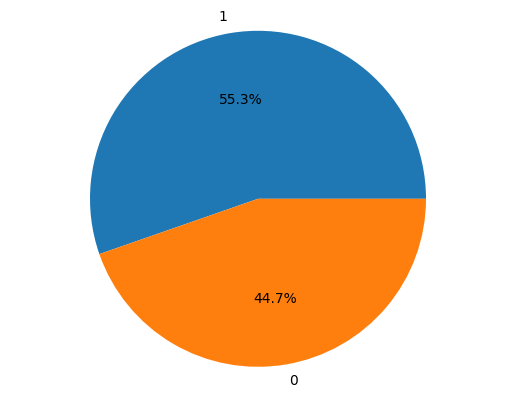

In [9]:
plt.pie(df['HeartDisease'].value_counts(), labels=df['HeartDisease'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [10]:
col_numerik = ['Age', 'RestingBP', 'Cholesterol','MaxHR', 'Oldpeak']
for i in col_numerik:
    print(f'Kolom {i} : {df[i].unique()}')

Kolom Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Kolom RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Kolom Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308

In [12]:
col_categorik = ['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease']
for i in col_categorik:
    print(f'Kolom {i} : {df[i].unique()}')

Kolom Sex : ['M' 'F']
Kolom ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
Kolom FastingBS : [0 1]
Kolom RestingECG : ['Normal' 'ST' 'LVH']
Kolom ExerciseAngina : ['N' 'Y']
Kolom ST_Slope : ['Up' 'Flat' 'Down']
Kolom HeartDisease : [0 1]


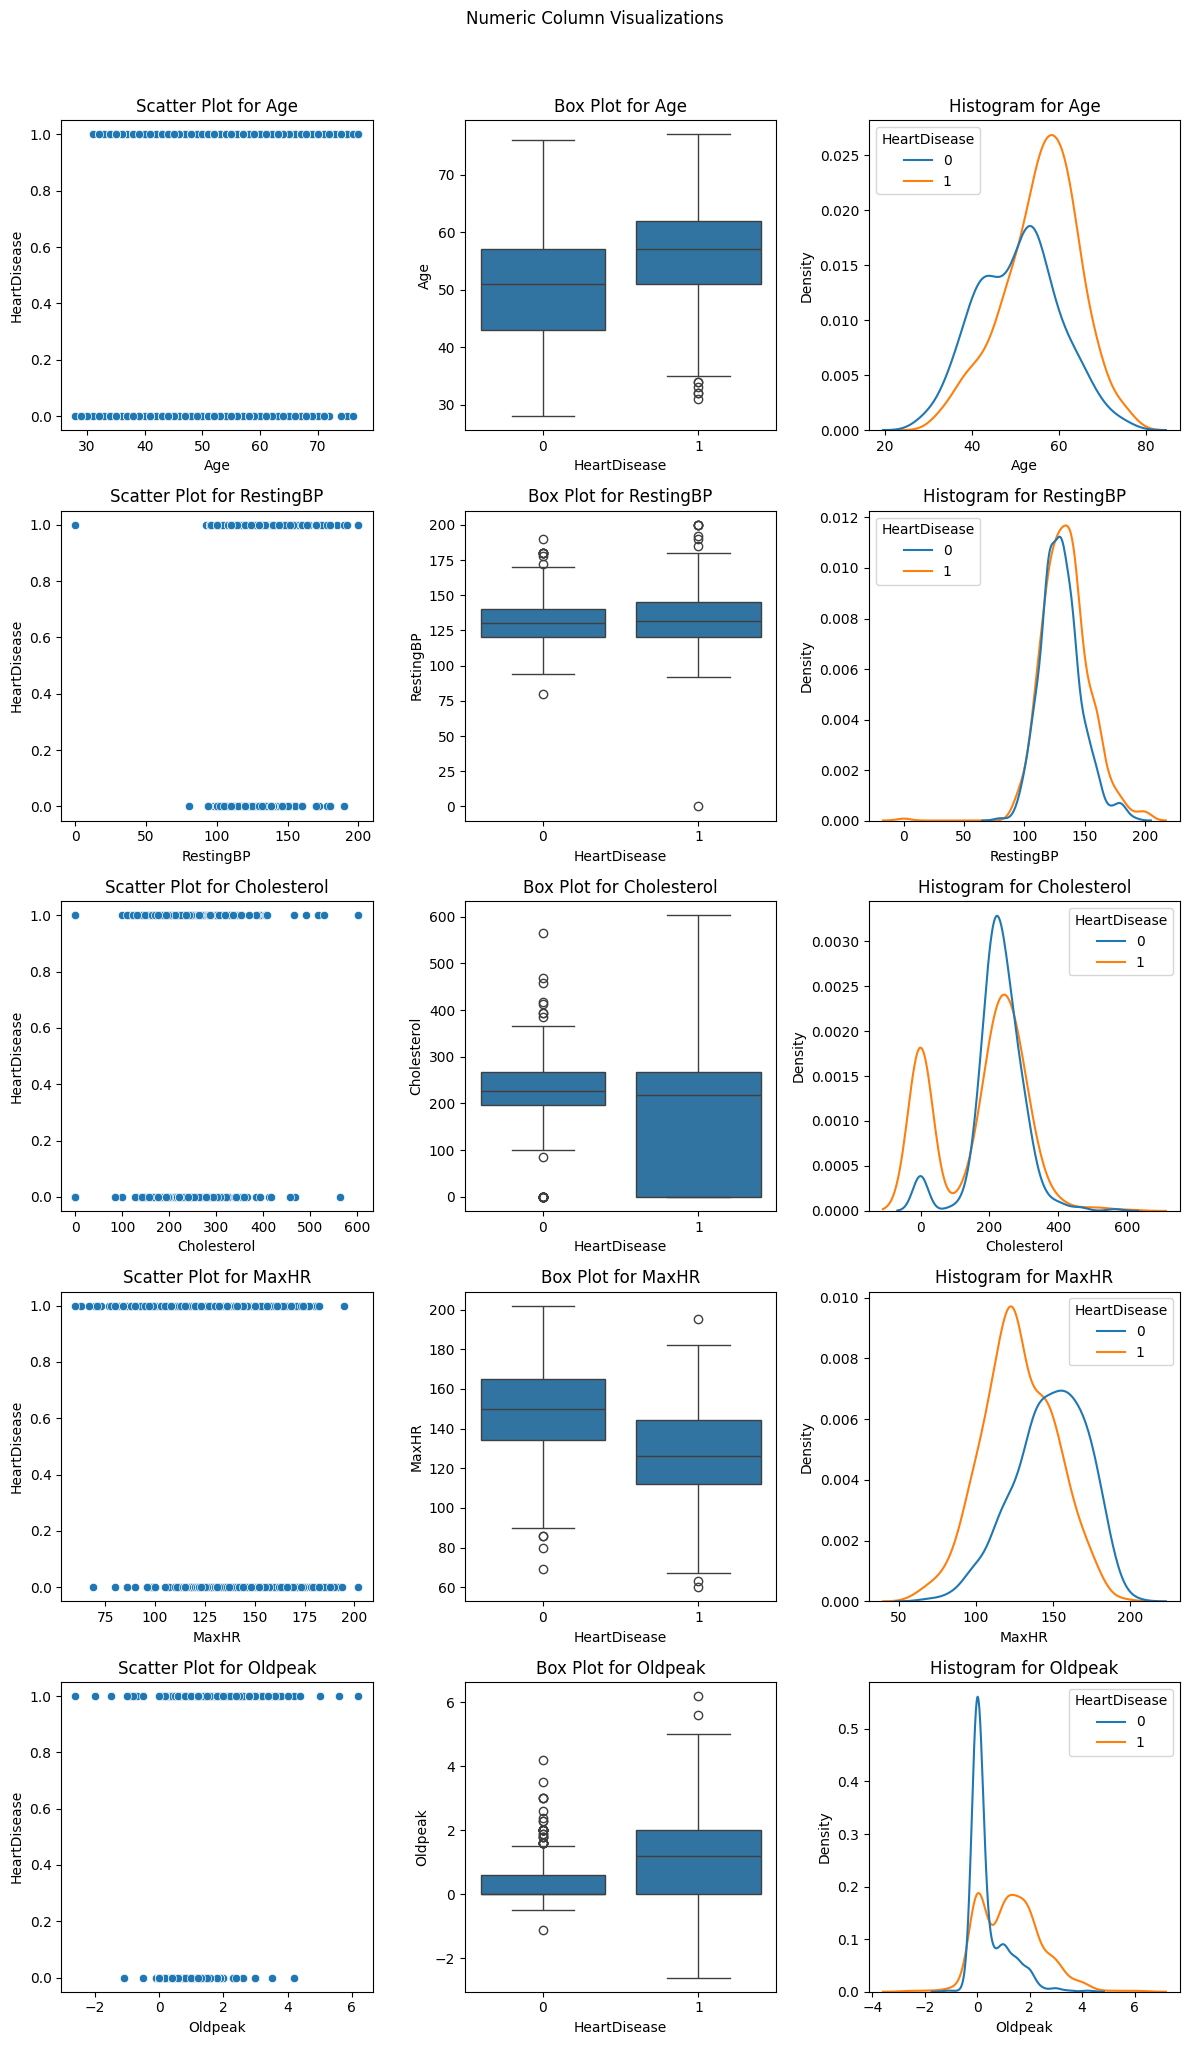

In [13]:
def plot_numeric_visualizations(df, numeric_columns):

    # Create subplots
    fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(12, 20))
    fig.suptitle('Numeric Column Visualizations', y=1.02)

    for i, column in enumerate(numeric_columns):
        # Scatter Plot
        sns.scatterplot(x=column, y='HeartDisease', data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'Scatter Plot for {column}')

        # Box Plot
        sns.boxplot(x='HeartDisease', y=column, data=df, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot for {column}')

        # Histogram
        sns.kdeplot(data=df, x=column,hue='HeartDisease',ax=axes[i, 2])
        axes[i, 2].set_title(f'Histogram for {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()
  # Example usage:
plot_numeric_visualizations(df, col_numerik)


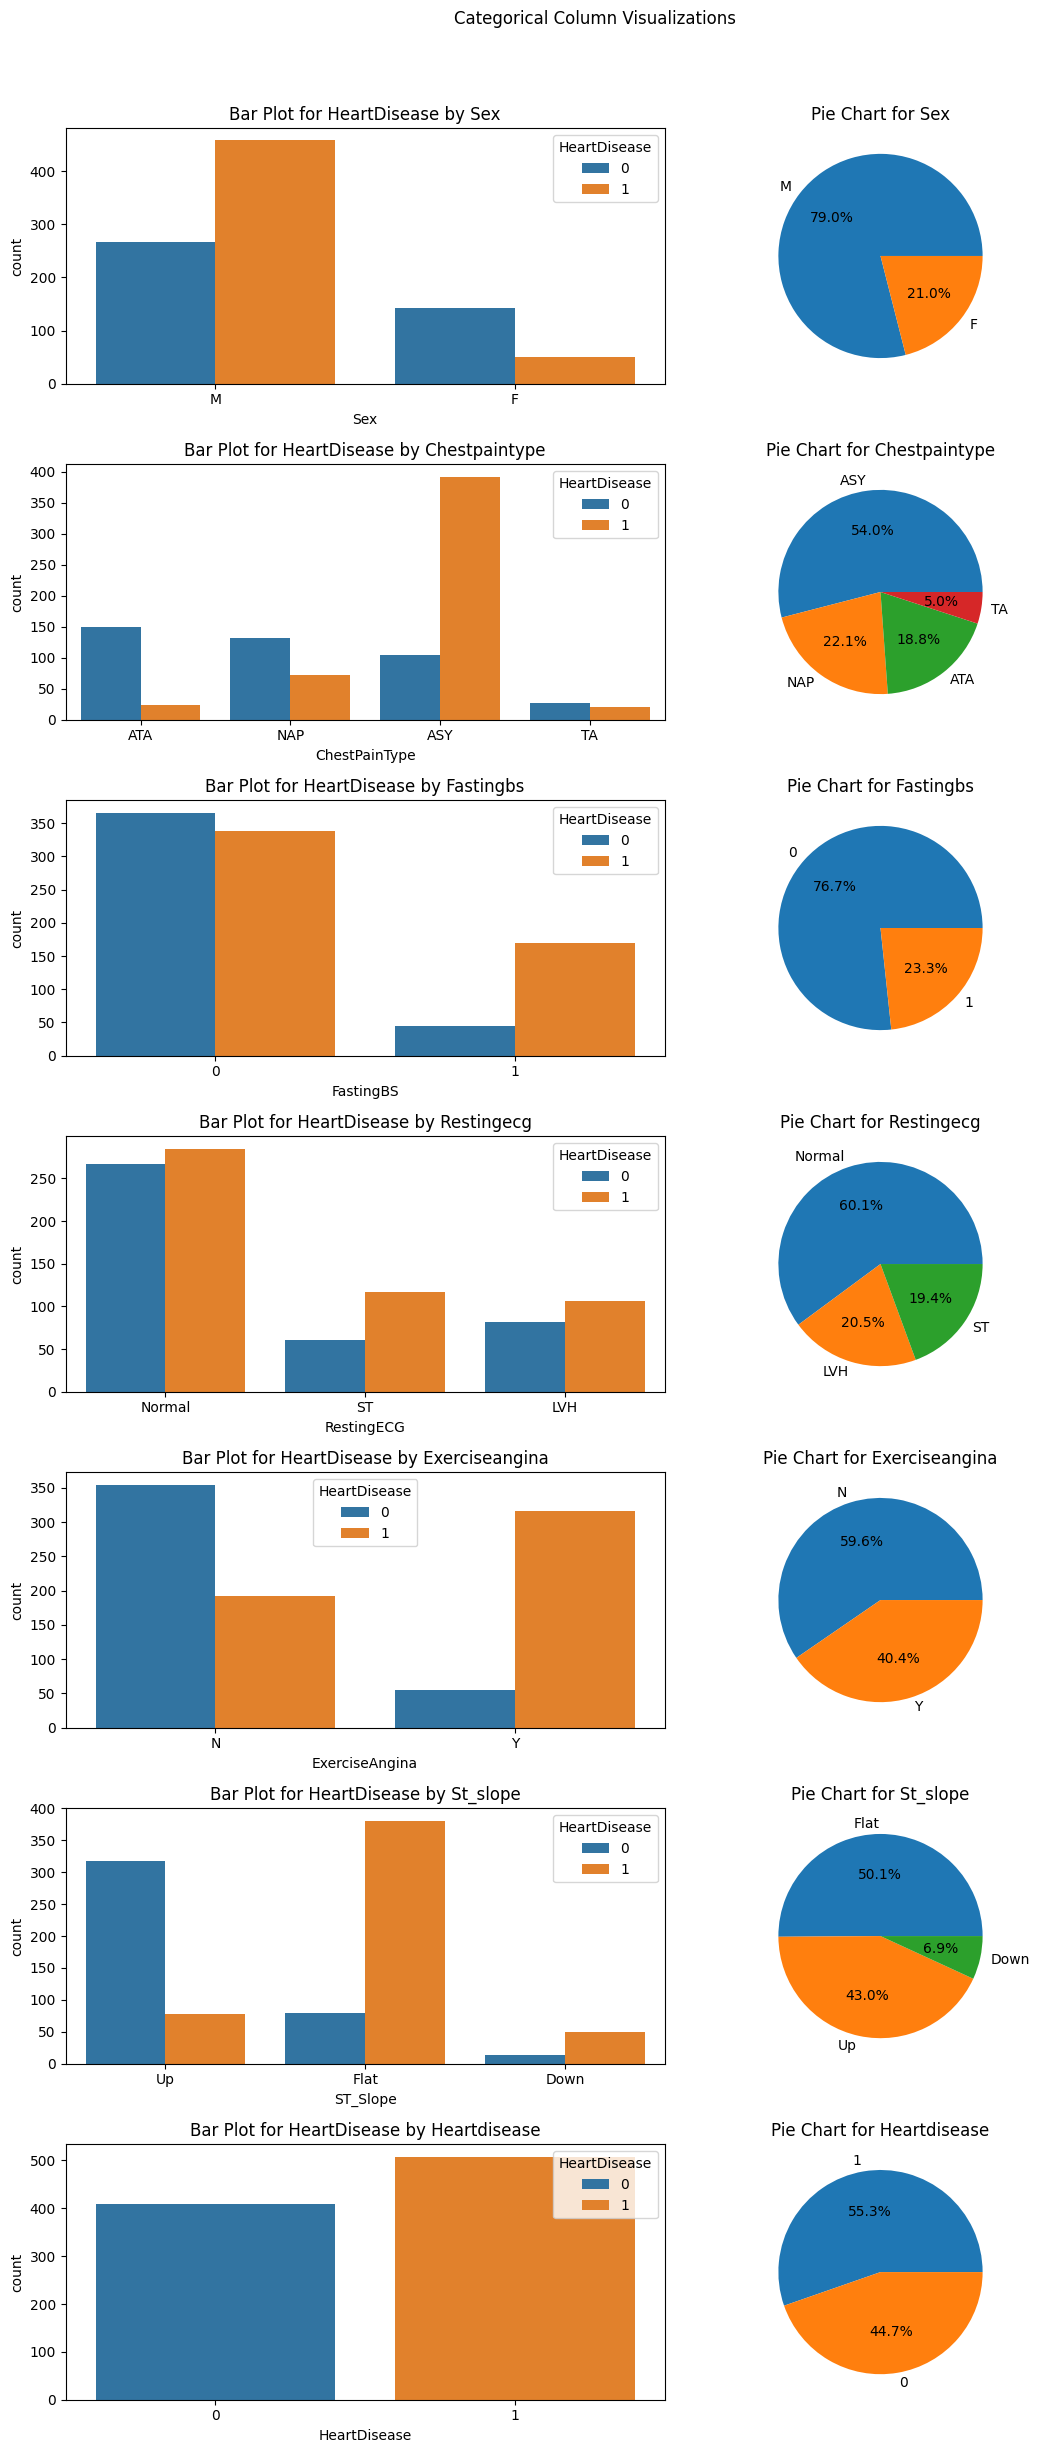

In [14]:
def plot_categorical_visualizations(df, categorical_columns):
    # Create subplots
    fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(12, 24))
    fig.suptitle('Categorical Column Visualizations', y=1.02)

    for i, column in enumerate(categorical_columns):
        # Bar Plot
        sns.countplot(x=column, hue='HeartDisease',data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'Bar Plot for HeartDisease by {column.capitalize()}')

        # Pie Chart
        df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1])
        axes[i, 1].set_title(f'Pie Chart for {column.capitalize()}')
        axes[i, 1].set_ylabel(None)


    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
plot_categorical_visualizations(df, col_categorik)

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
le = LabelEncoder()
for kolom in col_categorik:
    df[kolom] = le.fit_transform(df[kolom])
    print(f'Kolom {kolom} : {le.classes_}')

Kolom Sex : ['F' 'M']
Kolom ChestPainType : ['ASY' 'ATA' 'NAP' 'TA']
Kolom FastingBS : [0 1]
Kolom RestingECG : ['LVH' 'Normal' 'ST']
Kolom ExerciseAngina : ['N' 'Y']
Kolom ST_Slope : ['Down' 'Flat' 'Up']
Kolom HeartDisease : [0 1]


In [18]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [19]:
X = np.array(df.drop(columns=['HeartDisease']))
y = np.array(df['HeartDisease'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [22]:
X_train.shape, X_test.shape

((734, 11), (184, 11))

In [23]:
model = Pipeline([('scaler', StandardScaler()), ('RF',RandomForestClassifier(random_state=42))])
model.fit(X_train, y_train)

# Melakukan prediksi dan mengevaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [24]:
col = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
for i in range(len(model['RF'].feature_importances_)):
    a = model['RF'].feature_importances_[i]*100
    print(f'kolom {col[i]} : {a:.2f}%')

kolom Age : 8.55%
kolom Sex : 3.40%
kolom ChestPainType : 9.27%
kolom RestingBP : 6.65%
kolom Cholesterol : 10.72%
kolom FastingBS : 1.96%
kolom RestingECG : 2.63%
kolom MaxHR : 10.38%
kolom ExerciseAngina : 10.00%
kolom Oldpeak : 12.31%
kolom ST_Slope : 24.13%


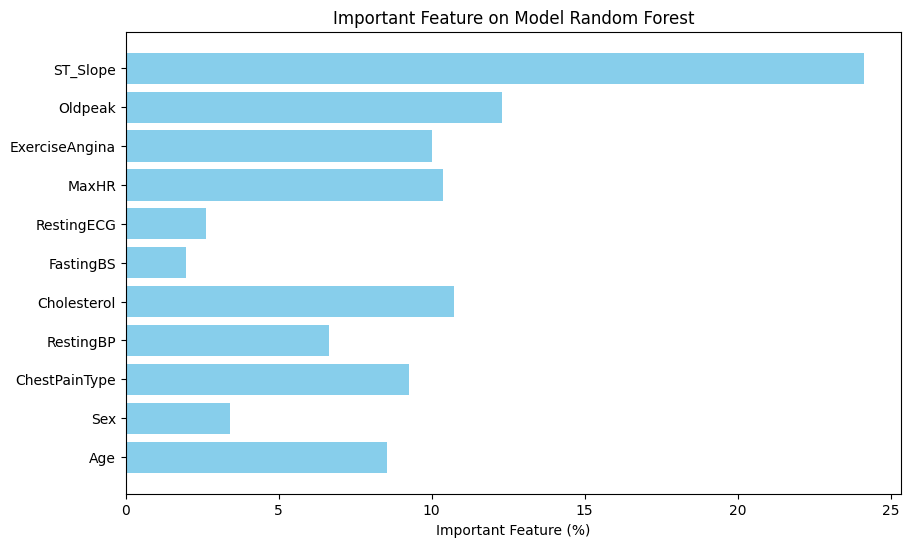

In [25]:
feature_importances = model['RF'].feature_importances_

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.barh(col, feature_importances * 100, color='skyblue')
plt.xlabel('Important Feature (%)')
plt.title('Important Feature on Model Random Forest')
plt.show()

In [26]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had HeartDisease', 'Had HeartDisease'])
    ax.yaxis.set_ticklabels(['Dont Had HeartDisease', 'Had HeartDisease'])
    plt.show()


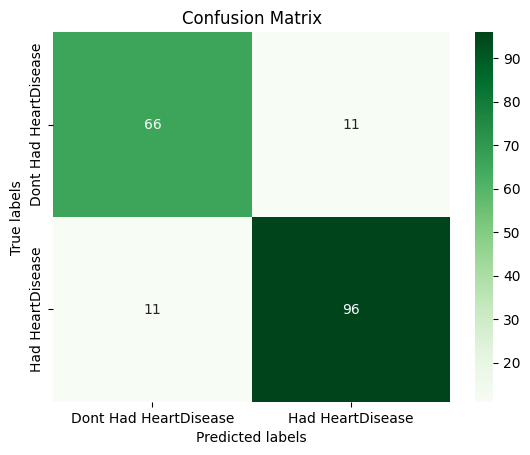

In [28]:
plot_confusion_matrix(y_test,y_pred)

In [29]:
predictt = []
for i in range(len(df.head())):
    predik_5_data_teratas = df.drop(columns=['HeartDisease']).iloc[i].tolist()
    predik = model.predict([predik_5_data_teratas])
    predictt.append(predik)
    print(f'{predik_5_data_teratas} : {predik}')

[40.0, 1.0, 1.0, 140.0, 289.0, 0.0, 1.0, 172.0, 0.0, 0.0, 2.0] : [0]
[49.0, 0.0, 2.0, 160.0, 180.0, 0.0, 1.0, 156.0, 0.0, 1.0, 1.0] : [1]
[37.0, 1.0, 1.0, 130.0, 283.0, 0.0, 2.0, 98.0, 0.0, 0.0, 2.0] : [0]
[48.0, 0.0, 0.0, 138.0, 214.0, 0.0, 1.0, 108.0, 1.0, 1.5, 1.0] : [1]
[54.0, 1.0, 2.0, 150.0, 195.0, 0.0, 1.0, 122.0, 0.0, 0.0, 2.0] : [0]


In [30]:
predictt = []
for i in range(len(df.tail())):
    predik_5_data_terbawah = df.tail().drop(columns=['HeartDisease']).iloc[i].tolist()
    predik = model.predict([predik_5_data_terbawah])
    predictt.append(predik)
    print(f'{predik_5_data_terbawah} : {predik}')

[45.0, 1.0, 3.0, 110.0, 264.0, 0.0, 1.0, 132.0, 0.0, 1.2, 1.0] : [1]
[68.0, 1.0, 0.0, 144.0, 193.0, 1.0, 1.0, 141.0, 0.0, 3.4, 1.0] : [1]
[57.0, 1.0, 0.0, 130.0, 131.0, 0.0, 1.0, 115.0, 1.0, 1.2, 1.0] : [1]
[57.0, 0.0, 1.0, 130.0, 236.0, 0.0, 0.0, 174.0, 0.0, 0.0, 1.0] : [1]
[38.0, 1.0, 2.0, 138.0, 175.0, 0.0, 1.0, 173.0, 0.0, 0.0, 2.0] : [0]


Conclusion
From this modeling it is known that randomforest has an accuracy of 88%